In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('./processed_data/df_train.csv')
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

In [3]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

In [4]:
df_test = pd.read_csv('./processed_data/df_test.csv')
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [5]:
# transform testing data
X_test_norm = norm.transform(X_test)

In [6]:
model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model.fit(X_train_norm, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [7]:
model.score(X_test_norm, y_test)

0.9737142857142858

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_norm)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[507  13   0   1   1   1   0]
 [ 29 489   0   0   0   1   3]
 [  0   0 503   0   4   7   1]
 [  0   0   0 469   3   0   0]
 [  1   0   6   1 470   0   0]
 [  0   0   3   0   3 512   2]
 [  0   1   6   0   1   4 458]]


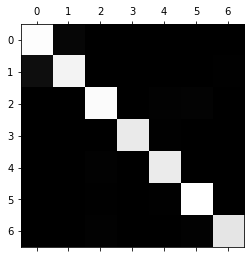

In [9]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

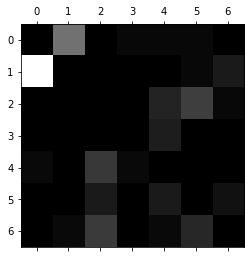

In [10]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

# rows represent actual classes
# columns represent predicted classes
plt.show()